# In Search Of Happiness: When Is It?

The happiness challenge on the go!  
We have already answered some questions about happiness. You can read about this and much more [here](https://nbviewer.jupyter.org/github/chupstee/data.sugar/blob/master/00002_world_happiness/world_happiness.map.ipynb).  
Today we wondered when we are becoming happier.  
We'll take [the World Happiness report from Kaggle](https://www.kaggle.com/unsdsn/world-happiness?select=2018.csv), which ranks 156 countries by their level of happiness on a 10-point scale.


## The World Happiness Report

Recall quoting Kaggle:

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

You can read more [here](https://www.kaggle.com/unsdsn/world-happiness).

We are most interested in the following columns:

- `Country or region` - country name
- `Overall rank` - country's place in the rating
- `Score` - happiness score


## Introduction

We'll try to identify the relationship between the level of happiness and the age of the population by country.

[The World Factbook](https://www.cia.gov/library/publications/the-world-factbook) by CIA provides information on the history, people and society, government, economy, energy, geography, communications, transportation, military, and transnational issues for 267 world entities.  
For our purposes, we will take the following indicators:

- `Life expectancy at birth` - the average number of years to be lived by a group of people born in the same year, if mortality at each age remains constant in the future. Life expectancy at birth is also a measure of overall quality of life in a country and summarizes the mortality at all ages.  
- `Median age` - the age that divides a population into two numerically equal groups; that is, half the people are younger than this age and half are older. It is a single index that summarizes the age distribution of a population. Currently, the median age ranges from a low of about 15 in Niger and Uganda to 40 or more in several European countries and Japan.  
- `Population growth rate` - the average annual percent change in populations, resulting from a surplus (or deficit) of births over deaths and the balance of migrants entering and leaving a country. The rate may be positive or negative.
- `Death rate` - the average annual number of deaths during a year per 1,000 population at midyear; also known as crude death rate.
- `Birth rate` - the average annual number of births during a year per 1,000 persons in the population at midyear; also known as crude birth rate.

We will compare the happiness scores with the CIA rates for 2018, as this is the year when the data is presented in the most complete way.  

Let's find out ***when*** *is happiness*.


## Reading The Data

In [1]:
# Import libs
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Happiness Reports

As we mentioned above, we'll read the happiness report published in 2018.  
We'll also rename the columns according to the snake_case format.

In [2]:
# Set the width to display
pd.set_option('display.width', 120)
# Increase the number of rows to display
pd.set_option('display.max_rows', 60) 

# Get the data
happiness = pd.read_csv('data/happiness_2018.csv')

# Column map to rename
cols_dict = {'Country':'country',
             'Country or region':'country',
             'Region':'region',
             'Happiness Rank':'rank',
             'Happiness.Rank':'rank',
             'Overall rank':'rank',
             'Happiness Score':'score',
             'Happiness.Score':'score',
             'Score':'score',
             'Economy (GDP per Capita)':'gdp_per_capita',
             'Economy..GDP.per.Capita.':'gdp_per_capita',
             'GDP per capita':'gdp_per_capita',
             'Family':'family',
             'Freedom':'freedom',
             'Freedom to make life choices':'freedom',
             'Generosity':'generosity',
             'Health (Life Expectancy)':'life_expectancy',
             'Health..Life.Expectancy.':'life_expectancy',
             'Healthy life expectancy':'life_expectancy',
             'Perceptions of corruption':'trust_corruption',
             'Trust (Government Corruption)':'trust_corruption',
             'Trust..Government.Corruption.':'trust_corruption',
             'Social support':'social_support',
             'Dystopia Residual':'dystopia_residual',
             'Dystopia.Residual':'dystopia_residual',
             'Standard Error':'standard_error',
             'Upper Confidence Interval':'whisker_high',
             'Whisker.high':'whisker_high',
             'Lower Confidence Interval':'whisker_low',
             'Whisker.low':'whisker_low'
            }

# Rename the columns
happiness.rename(columns=cols_dict, inplace=True)

print(happiness.columns) # check the new column names
happiness.head() # check the values

Index(['rank', 'country', 'score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity',
       'trust_corruption'],
      dtype='object')


,rank,country,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,trust_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [3]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              156 non-null    int64  
 1   country           156 non-null    object 
 2   score             156 non-null    float64
 3   gdp_per_capita    156 non-null    float64
 4   social_support    156 non-null    float64
 5   life_expectancy   156 non-null    float64
 6   freedom           156 non-null    float64
 7   generosity        156 non-null    float64
 8   trust_corruption  155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


We see 156 countries in the report of 2018. There are no missing values for the `country`, `rank`, `score` columns.

Let's check for duplicates.

In [4]:
# Duplicated
print('Duplicated: {}'.format(happiness.duplicated(subset='country').sum()))

Duplicated: 0


It's OK. Let's get the CIA data.

### CIA Reports

We have downloaded The World Factbook archive for different years and saved the data that was collected in 2018.

In [5]:
cia_files = glob('data/cia.age.*.2018.txt')
cia = pd.DataFrame()

for file in cia_files:
    c = pd.read_csv(file,
                    engine='python', sep=r'\s{3,}', header=None,
                    names=['country_cia', file.split('.')[2], 'data_year'],
                    squeeze=False, skiprows=1, index_col=0,
                    thousands=',', dtype={file.split('.')[2]:'float64'}
                   )[['country_cia', file.split('.')[2]]] # read the file
    if cia.size == 0:
        cia = cia.append(c)
        print('Initialize {}: {}'.format(file.split('.')[2], cia.shape[0])) # for the first file
    else:
        cia = cia.merge(c, on='country_cia', how='outer')
        print('Merge {}: {}'.format(file.split('.')[2], cia.shape[0]))

cia.reset_index()

cia.info()
cia

Initialize birth: 226
Merge death: 226
Merge life_expectancy_at_birth: 226
Merge median_age: 229
Merge population_growth: 237
<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_cia               237 non-null    object 
 1   birth                     226 non-null    float64
 2   death                     226 non-null    float64
 3   life_expectancy_at_birth  223 non-null    float64
 4   median_age                228 non-null    float64
 5   population_growth         234 non-null    float64
dtypes: float64(5), object(1)
memory usage: 13.0+ KB


,country_cia,birth,death,life_expectancy_at_birth,median_age,population_growth
0,Angola,43.7,9.0,60.6,15.9,3.49
1,Niger,43.6,11.5,56.3,15.5,3.16
2,Mali,43.2,9.6,60.8,15.8,2.98
3,Chad,43.0,10.5,57.5,15.8,3.23
4,Uganda,42.4,9.9,56.3,15.9,3.18
...,...,...,...,...,...,...
232,Cocos (Keeling) Islands,NaN,NaN,NaN,NaN,0.00
233,Pitcairn Islands,NaN,NaN,NaN,NaN,0.00
234,Tokelau,NaN,NaN,NaN,NaN,-0.01
235,Svalbard,NaN,NaN,NaN,NaN,-0.03


It is interesting to see what the median age and life expectancy in the world are.

In [6]:
cia.describe()

,birth,death,life_expectancy_at_birth,median_age,population_growth
count,226.000000,226.000000,223.000000,228.00000,234.000000
mean,18.816372,7.650442,73.296861,30.99386,1.006154
std,9.345047,2.717405,7.639940,8.95895,1.159035
min,6.500000,1.600000,52.100000,15.50000,-3.130000
25%,11.600000,5.900000,68.400000,23.37500,0.262500
50%,15.850000,7.400000,75.200000,30.65000,0.940000
75%,23.475000,9.275000,78.900000,38.82500,1.710000
max,43.700000,19.300000,89.400000,53.80000,7.370000


Life expectancy today is about 73 years. The average age of a modern person is about 30 years.  
What are the countries with the lowest life expectancy at birth and median age?  
Let's define TOP5 ratings.

In [7]:
# Print the countries with the min life expectancy at birth
print('TOP5 countries with the min life expectancy at birth')
cia[['country_cia', 'life_expectancy_at_birth']].sort_values(by='life_expectancy_at_birth', ascending=True).head()

TOP5 countries with the min life expectancy at birth


,country_cia,life_expectancy_at_birth
11,Afghanistan,52.1
5,Zambia,53.0
51,Lesotho,53.0
8,Somalia,53.2
23,Central African Republic,53.3


In [8]:
# Print the countries with the min median age
print('TOP5 countries with the min median age')
cia[['country_cia', 'median_age']].sort_values(by='median_age', ascending=True).head()

TOP5 countries with the min median age


,country_cia,median_age
1,Niger,15.5
2,Mali,15.8
3,Chad,15.8
0,Angola,15.9
4,Uganda,15.9


What are the countries with the highest life expectancy at birth and median age?

In [9]:
# Print the countries with the max life expectancy at birth
print('TOP5 countries with the max life expectancy at birth')
cia[['country_cia', 'life_expectancy_at_birth']].sort_values(by='life_expectancy_at_birth', ascending=False).head()

TOP5 countries with the max life expectancy at birth


,country_cia,life_expectancy_at_birth
225,Monaco,89.4
211,Singapore,85.5
222,Japan,85.5
216,Macau,84.6
213,San Marino,83.4


In [10]:
# Print the countries with the max median age
print('TOP5 countries with the max median age')
cia[['country_cia', 'median_age']].sort_values(by='median_age', ascending=False).head()

TOP5 countries with the max median age


,country_cia,median_age
225,Monaco,53.8
222,Japan,47.7
212,Germany,47.4
224,Saint Pierre and Miquelon,47.2
215,Italy,45.8


## Preparing The Data Sets

Now we should combine the `happiness` and `cia` datasets.

First, we need to check the columns that will be used for merging.
Country names may differ in data sets, for instance, `eSwatini` and `Swaziland`, `Trinidad and Tobago` and `Trinidad & Tobago`. In this case, the rows will not match.

Before, we store the `country_cia` column of the `cia` in a new column `country`.

In [11]:
cia['country'] = cia['country_cia']

Let's compare the `country` columns of the `happiness` data set and the `cia` data set.
To do this, we'll combine two data sets using `outer` join.

In [12]:
happiness_cia = happiness.merge(cia, on='country', how='outer')[['country', 'score', 'population_growth']]

pd.set_option('display.max_rows', 100) # increase the number of rows to display
happiness_cia[happiness_cia.isnull().any(axis=1)].sort_values(by=['score', 'country']) # the countries don't match

,country,score,population_growth
131,Congo (Kinshasa),4.245,NaN
129,Myanmar,4.308,NaN
113,Congo (Brazzaville),4.559,NaN
106,Ivory Coast,4.671,NaN
103,Palestinian Territories,4.743,NaN
65,Kosovo,5.662,NaN
57,Northern Cyprus,5.835,NaN
56,South Korea,5.875,NaN
37,Trinidad & Tobago,6.192,NaN
20,Czech Republic,6.711,NaN


To provide the same country names:

- Create a dictionary mapping all names to the values in the `happiness` dataset since we explore the happiness data.
- Rename the countries in the `cia` dataset by replacing the values according to the map dictionary.

In [13]:
# Countries map to rename
country_to_rename = {'Cote d\'Ivoire':'Ivory Coast',
                     'Congo, Republic of the':'Congo (Brazzaville)',
                     'Congo, Democratic Republic of the':'Congo (Kinshasa)',
                     'Burma':'Myanmar',
                     'Korea, South':'South Korea',
                     'Czechia':'Czech Republic',
                     'Trinidad and Tobago':'Trinidad & Tobago',
                     'Korea, South':'South Korea'
                    }
# Rename the countries
cia['country'].replace(country_to_rename, inplace=True)

cia.sample(5, random_state=11) # check the values randomly

,country_cia,birth,death,life_expectancy_at_birth,median_age,population_growth,country
127,New Caledonia,14.8,5.7,78.0,32.3,1.30,New Caledonia
41,Egypt,28.8,4.5,73.2,23.9,2.38,Egypt
55,Jordan,23.6,3.4,75.0,22.8,2.02,Jordan
158,Trinidad and Tobago,12.3,8.9,73.4,36.6,-0.23,Trinidad & Tobago
220,Taiwan,8.2,7.6,80.4,41.3,0.15,Taiwan


We can now use the `country` column to merge the two datasets.

In [14]:
happiness_cia = happiness.merge(cia, on='country', how='left').copy()

happiness_cia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rank                      156 non-null    int64  
 1   country                   156 non-null    object 
 2   score                     156 non-null    float64
 3   gdp_per_capita            156 non-null    float64
 4   social_support            156 non-null    float64
 5   life_expectancy           156 non-null    float64
 6   freedom                   156 non-null    float64
 7   generosity                156 non-null    float64
 8   trust_corruption          155 non-null    float64
 9   country_cia               154 non-null    object 
 10  birth                     153 non-null    float64
 11  death                     153 non-null    float64
 12  life_expectancy_at_birth  151 non-null    float64
 13  median_age                154 non-null    float64
 14  population

In [15]:
happiness_cia.sort_values(by='median_age', ascending=False)

,rank,country,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,trust_corruption,country_cia,birth,death,life_expectancy_at_birth,median_age,population_growth
53,54,Japan,5.915,1.294,1.462,0.988,0.553,0.079,0.150,Japan,7.5,9.9,85.5,47.7,-0.24
14,15,Germany,6.965,1.340,1.474,0.861,0.586,0.273,0.280,Germany,8.6,11.8,80.9,47.4,-0.17
46,47,Italy,6.000,1.264,1.501,0.946,0.281,0.137,0.028,Italy,8.5,10.5,82.4,45.8,0.16
78,79,Greece,5.358,1.154,1.202,0.879,0.131,0.000,0.044,Greece,8.3,11.4,80.8,44.9,-0.07
75,76,Hong Kong,5.430,1.405,1.290,1.030,0.524,0.246,0.291,Hong Kong,8.8,7.6,83.1,44.8,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,118,Mali,4.447,0.370,1.233,0.152,0.367,0.139,0.056,Mali,43.2,9.6,60.8,15.8,2.98
130,131,Chad,4.301,0.358,0.907,0.053,0.189,0.181,0.060,Chad,43.0,10.5,57.5,15.8,3.23
133,134,Niger,4.166,0.131,0.867,0.221,0.390,0.175,0.099,Niger,43.6,11.5,56.3,15.5,3.16
57,58,Northern Cyprus,5.835,1.229,1.211,0.909,0.495,0.179,0.154,NaN,NaN,NaN,NaN,NaN,NaN


Unfortunately, the happiness score is not defined for the country with the highest median age, Monaco. We'll have to exclude this country from consideration. However, this doesn't prevent us from high level evaluating the relationships between the indicators.  
Let's build a correlation matrix by columns.

In [16]:
# Select the columns of interest
cols_corr = ['country', 'score',
             'life_expectancy_at_birth',
             'median_age', 'birth',
             'population_growth', 'death'
            ]
happiness_cia = happiness_cia[cols_corr]
happiness_cia

,country,score,life_expectancy_at_birth,median_age,birth,population_growth,death
0,Finland,7.632,81.1,42.6,10.7,0.33,10.1
1,Norway,7.594,82.0,39.3,12.2,0.94,8.0
2,Denmark,7.555,81.0,41.9,10.9,0.59,9.3
3,Iceland,7.495,83.1,36.7,13.6,1.08,6.5
4,Switzerland,7.487,82.7,42.5,10.5,0.68,8.4
...,...,...,...,...,...,...,...
151,Yemen,3.355,66.2,19.8,27.6,2.17,5.9
152,Tanzania,3.303,63.1,17.9,35.3,2.74,7.5
153,South Sudan,3.254,NaN,18.1,36.9,-1.16,19.3
154,Central African Republic,3.083,53.3,19.8,34.0,2.11,12.9


In [17]:
# Get correlation matrix
happiness_cia_corr = happiness_cia.corr()
happiness_cia_corr

,score,life_expectancy_at_birth,median_age,birth,population_growth,death
score,1.000000,0.769120,0.695265,-0.696422,-0.451656,-0.153188
life_expectancy_at_birth,0.769120,1.000000,0.834006,-0.878106,-0.560722,-0.252565
median_age,0.695265,0.834006,1.000000,-0.928359,-0.737640,0.221676
birth,-0.696422,-0.878106,-0.928359,1.000000,0.734081,0.027833
population_growth,-0.451656,-0.560722,-0.737640,0.734081,1.000000,-0.357264
death,-0.153188,-0.252565,0.221676,0.027833,-0.357264,1.000000


We can see relationships between some parameters. 
Let's plot the most interesting of them.

## Life Expectancy at Birth And Happiness

In [18]:
%matplotlib inline

# Turn on svg rendering
%config InlineBackend.figure_format = 'svg'

# Color palette for the blog
snark_palette = ['#e0675a', # red
                 '#5ca0af', # green
                 '#edde7e', # yellow
                 '#211c47' # dark blue
                ]

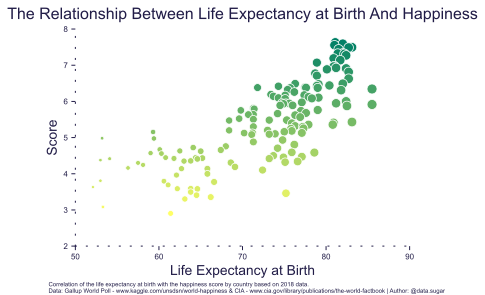

In [19]:
# Color palette for the data
palette = 'summer_r'

# Inscriptions
title = """The Relationship Between Life Expectancy at Birth And Happiness"""
description = """
Correlation of the life expectancy at birth with the happiness score by country based on 2018 data.
Data: Gallup World Poll - www.kaggle.com/unsdsn/world-happiness & CIA - www.cia.gov/library/publications/the-world-factbook | Author: @data.sugar
"""

# Plot size
figsize = (6,4)

# Set the figure
sns.set(context='paper', style='ticks', palette=snark_palette,
        rc={'xtick.major.size': 4, 'ytick.major.size':4,
            'axes.spines.left': True, 'axes.spines.bottom': True,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
fig = plt.figure(figsize=figsize, facecolor='w')
ax = sns.scatterplot(x='life_expectancy_at_birth', y='score',
                     hue=happiness_cia['score'].tolist(),
                     size=happiness_cia['life_expectancy_at_birth'].tolist(),
                     sizes=(10,100),
                     data=happiness_cia,
                     palette=palette, legend=False
                    )

# Set some aesthetic params for the plot
ax.set_title(title, fontdict={'fontsize': 16}, loc='center', pad=10, c=snark_palette[-1]) # set a title of the plot
ax.annotate(description, xy=(0.1, -0.015), size=6, xycoords='figure fraction', c=snark_palette[-1])
ax.spines['bottom'].set_linestyle((0, (1, 10)))
ax.spines['bottom'].set_color(snark_palette[-1])
ax.spines['left'].set_linestyle((0, (1, 10)))
ax.spines['left'].set_color(snark_palette[-1])
ax.set_xlabel('Life Expectancy at Birth', loc='center', size='x-large', c=snark_palette[-1]) # set label of x axis
ax.set_xticks([i for i in range(50, 100, 10)])
ax.set_xticklabels([i for i in range(50, 100, 10)], c=snark_palette[-1])
ax.set_ylabel('Score', loc='center', size='x-large', c=snark_palette[-1]) # set label of y axis
ax.set_yticks([i for i in range(2, 9)])
ax.set_yticklabels([i for i in range(2, 9)], c=snark_palette[-1])
ax.tick_params(axis='both', labelsize='small', colors=snark_palette[-1], direction='out') # set x/y ticks

# Save and plot
plt.savefig('plot.pic/plot.happiness.life_exp_at_birth.png', dpi=150, bbox_inches='tight')
plt.show()

## Median Age And Happiness Score

We would like to see how happiness is distributed according to the age of the population.  
To do this, we will divide the countries by age group based on the median age.

In [20]:
# Calculate min and max median age
median_age_min = cia['median_age'].min()
median_age_max = cia['median_age'].max()

# Calculate bins
bin_step = 5
bin_from = int((median_age_min // bin_step) * bin_step)
bin_to = int((median_age_max // bin_step) * bin_step + bin_step)
bins = [i for i in range(bin_from, bin_to, bin_step)] # age groups

happiness_cia['age_range'] = pd.cut(happiness_cia['median_age'], bins)
happiness_cia_grouped = (happiness_cia[['age_range', 'median_age', 'score']].groupby('age_range')
                                                                            .mean()
                                                                            .reset_index()
                        )
happiness_cia_grouped

,age_range,median_age,score
0,"(15, 20]",18.134375,4.083625
1,"(20, 25]",22.980952,4.746381
2,"(25, 30]",28.318519,5.493296
3,"(30, 35]",32.005263,5.717632
4,"(35, 40]",37.645000,6.170850
5,"(40, 45]",42.484375,6.202000
6,"(45, 50]",46.966667,6.293333


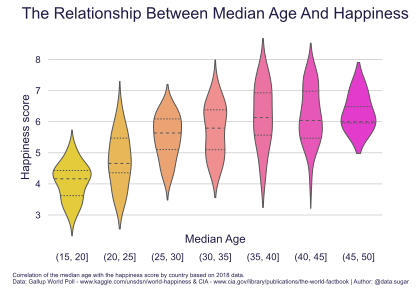

In [29]:
# Inscriptions
title = """The Relationship Between Median Age And Happiness"""
description = """
Correlation of the median age with the happiness score by country based on 2018 data.
Data: Gallup World Poll - www.kaggle.com/unsdsn/world-happiness & CIA - www.cia.gov/library/publications/the-world-factbook | Author: @data.sugar
"""

# Plot size
figsize = (6,4)

# Set the figure
sns.set(context='paper', style='whitegrid', palette=snark_palette,
        rc={'xtick.major.size': 4, 'ytick.major.size':4,
            'axes.spines.left': False, 'axes.spines.bottom': False,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
fig = plt.figure(figsize=figsize, facecolor='w')
ax = sns.violinplot(x='age_range', y='score', data=happiness_cia,
                    inner='quart', linewidth=1,
                    palette='spring_r'
                   )

# Set some aesthetic params for the plot
ax.set_title(title, fontdict={'fontsize': 16}, loc='center', pad=10, c=snark_palette[-1]) # set a title of the plot
ax.annotate(description, xy=(0.03, 0), size=6, xycoords='figure fraction', c=snark_palette[-1])
ax.xaxis.set_label_text('') # remove label of x axis
ax.text(s='Median Age', x=3, y=2.2, horizontalalignment='center', verticalalignment='center', size='large', c=snark_palette[-1]) # set label of x axis
ax.set_ylabel('Happiness score', loc='center', size='large', c=snark_palette[-1]) # set label of y axis
ax.tick_params(axis='both', labelsize='medium', colors=snark_palette[-1]) # set x/y ticks

# Save and plot
plt.savefig('plot.pic/plot.happiness.median_age.png', dpi=150, bbox_inches='tight')
plt.show()

## Correlation Map

We'll plot the correlation matrix below, but first, we'll prepare the data to make the plot easier to read.

In [22]:
# A triangular mask to avoid repeated values
happiness_cia_corr = happiness_cia_corr.iloc[1:, :-1]
mask = np.triu(np.ones_like(happiness_cia_corr), k=1)

# Readable names for the plot
cols_dict = {'score':'Happiness',
             'life_expectancy_at_birth':'Life exp.\nat birth',
             'median_age':'Median\nage',
             'birth':'Birth',
             'population_growth':'Population\ngrowth',
             'death':'Death'
            }
# Rename columns in the correlation matrix
happiness_cia_corr.rename(columns=cols_dict, index=cols_dict, inplace=True)

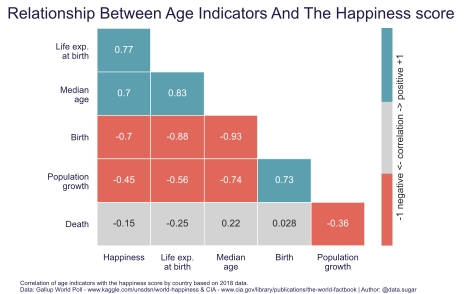

In [23]:
# Color palette for the data
palette = [snark_palette[0], # red
           'lightgrey',
           snark_palette[1] # green
          ]

# Inscriptions
title = """Relationship Between Age Indicators And The Happiness score"""
description = """
Сorrelation of age indicators with the happiness score by country based on 2018 data.
Data: Gallup World Poll - www.kaggle.com/unsdsn/world-happiness & CIA - www.cia.gov/library/publications/the-world-factbook | Author: @data.sugar
"""

# Plot size
figsize = (6,4)

# Set the figure
sns.set(context='paper', style='ticks', palette=palette,
        rc={'xtick.bottom':False, 'ytick.left':False, 
            'axes.spines.left': False, 'axes.spines.bottom': False,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
sns.heatmap(happiness_cia_corr, mask=mask, cmap=palette,
            vmin=-1, vmax=1, center=0,
            square=False, linewidths=.5, annot=True, fmt='.2g',
            cbar_kws={'shrink': 1, 'ticks':[], 'label':'-1 negative <- correlation -> positive +1'},
            ax=ax)

# Set some aesthetic params for the plot
ax.set_title(title, fontdict={'fontsize': 16}, loc='center', pad=10, c=snark_palette[-1]) # set a title of the plot
ax.annotate(description, xy=(20, -4), size=6, xycoords='figure points', c=snark_palette[-1])
ax.tick_params(axis='both', colors=snark_palette[-1]) # set x/y ticks
ax.set_yticklabels(ax.get_yticklabels(), rotation=0) # set rotation for y tick labels

# Save and plot
plt.savefig('plot.pic/plot.happiness.age.png', dpi=150, bbox_inches='tight')
plt.show()

Not surprisingly, the older the population, the lower the birth rate. It's surprising how strong the correlation is between birth rate and median age.  
The younger population has a higher population growth rate, but it is less happy.

## Median Age And Birth

<Figure size 432x288 with 0 Axes>

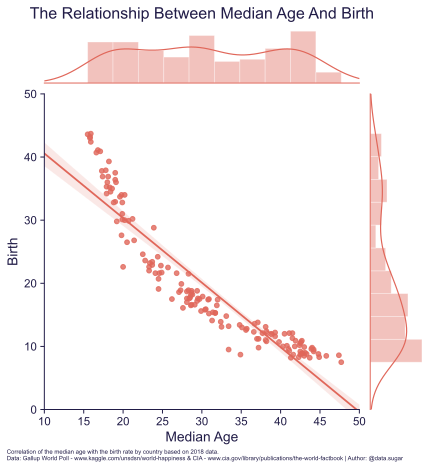

In [24]:
# Inscriptions
title = """The Relationship Between Median Age And Birth"""
description = """
Correlation of the median age with the birth rate by country based on 2018 data.
Data: Gallup World Poll - www.kaggle.com/unsdsn/world-happiness & CIA - www.cia.gov/library/publications/the-world-factbook | Author: @data.sugar
"""

# Plot size
figsize = (6,4)

# Set the figure
sns.set(context='paper', style='ticks', palette=snark_palette,
        rc={'xtick.major.size': 4, 'ytick.major.size':4,
            'axes.spines.left': False, 'axes.spines.bottom': False,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
fig = plt.figure(figsize=figsize, facecolor='w')
g = sns.jointplot(x='median_age', y='birth', data=happiness_cia,
                  kind='reg', truncate=False, dropna=True,
                  xlim=(10, 50), ylim=(0, 50),
                  marginal_kws=dict(hist=True, bins=10),
                  color=snark_palette[0]
                 )

# Set some aesthetic params for the plot
g.ax_marg_x.set_title(title, fontdict={'fontsize': 16}, loc='center', pad=10, c=snark_palette[-1]) # set a title of the plot
g.ax_marg_x.annotate(description, xy=(0.015, -0.01), size=6, xycoords='figure fraction', c=snark_palette[-1])
g.ax_joint.set_xlabel('Median Age', loc='center', size='x-large', c=snark_palette[-1]) # set label of x axis
g.ax_joint.set_ylabel('Birth', loc='center', size='x-large', c=snark_palette[-1]) # set label of y axis
g.ax_joint.tick_params(axis='both', labelsize='large', colors=snark_palette[-1]) # set x/y ticks
g.ax_joint.spines['bottom'].set_color(snark_palette[-1]) # color x axis
g.ax_joint.spines['left'].set_color(snark_palette[-1]) # color y axis
g.ax_marg_x.tick_params(axis='x', bottom=False) # disable x margin ticks
g.ax_marg_x.spines['bottom'].set_color(snark_palette[0])
g.ax_marg_y.tick_params(axis='y', left=False) # disable y margin ticks
g.ax_marg_y.spines['left'].set_color(snark_palette[0])

# Save and plot
plt.savefig('plot.pic/plot.happiness.age.birth.png', dpi=150, bbox_inches='tight')
plt.show()

## Conclusions

[In the previous project](https://nbviewer.jupyter.org/github/chupstee/data.sugar/blob/master/00002_world_happiness/world_happiness.where.map.ipynb), we have already defined the TOP5 least happy countries. This rating includes Afghanistan and the Central African Republic.  
These countries were also included in the TOP5 countries with the lowest life expectancy at birth.  

Life expectancy at birth describes the overall quality of life in the country and indicates the health of the population. Not surprisingly, the higher the life expectancy at birth, the higher the happiness score.  

Let's take a look at the relationship between median age and happiness.  
It seems that society in its development reaches some point of saturation, when a person, living a longer life, does not become happier.  

Some correlations indicate that the older the population, the less striving (or able?) to self-reproduction:

- the higher median age, the lower population growth;
- the higher median age, the lower birth rate.

Earlier, we found out that thirty three is a special age. You will find research on this topic [here](https://nbviewer.jupyter.org/github/chupstee/data.sugar/blob/master/00001_thirty_years_old/thirty_years_old.ipynb).  
It is curious that the age of the population over which the happiness score does not change significantly is also about thirty five years old.  
Even more interesting is that the median age of the world's population is thirty years, as we saw above.  
Well, perhaps humanity is in its prime. On average, of course.  


# Blog Post

In [32]:
blog_post = r"""
## IN SEARCH OF 🎈HAPPINESS: 🕗WHEN?  


💪The \#happiness \#challenge on the go!  

👀Today we wondered when we are becoming happier.
To compare population age with happiness score, we'll take the World Happiness Report from \#Kaggle, which ranks 156 countries for happiness on a 10-point scale, and use \#CIA data from The World Factbook.

📌We will try to discover the happiest age!  

✔In the previous project \#data_sugar_happiness, we have already defined the \#TOP5 least happy countries.  
This rating includes Afghanistan and the Central African Republic.  
These countries were also included in the TOP5 countries with the lowest life expectancy at birth.  

✔Life expectancy at birth describes the overall quality of life in the country and indicates the health of the population.  
Not surprisingly, the higher the life expectancy at birth, the higher the happiness score.  

✔Let's take a look at the relationship between median age and happiness.  
It seems that society in its development reaches some point of saturation, when a person, living a longer \#life, does not become happier.  

✔Some correlations indicate that the older the \#population, the less striving (or able?) to self-reproduction:

- the higher median age, the lower population growth;
- the higher median age, the lower birth rate.

📝Earlier \#data_sugar_brain, we found out that 33 is a special age.  
It is curious that the age of the population over which the happiness score does not change significantly is also about 35 years old.  
Even more interesting is that the median age of the world's population is 30 years, as we saw above.  
Well, perhaps \#humanity is in its \#prime. On average, of course.  

\#tobecontinued

(Interested in more details? Follow the link in bio for the entire research project!)  
.  
.  
.  
\#funtime \#probably \#datascience \#datapower \#data_sugar_happiness \#happy
\#data_know_everything_and_nothing \#linkinbio \#datajournalism \#python
"""

# Check post text length for Instagram
len(blog_post)

1963

In [33]:
from IPython.display import Markdown as md
md(blog_post)


## IN SEARCH OF 🎈HAPPINESS: 🕗WHEN?  


💪The \#happiness \#challenge on the go!  

👀Today we wondered when we are becoming happier.
To compare population age with happiness score, we'll take the World Happiness Report from \#Kaggle, which ranks 156 countries for happiness on a 10-point scale, and use \#CIA data from The World Factbook.

📌We will try to discover the happiest age!  

✔In the previous project \#data_sugar_happiness, we have already defined the \#TOP5 least happy countries.  
This rating includes Afghanistan and the Central African Republic.  
These countries were also included in the TOP5 countries with the lowest life expectancy at birth.  

✔Life expectancy at birth describes the overall quality of life in the country and indicates the health of the population.  
Not surprisingly, the higher the life expectancy at birth, the higher the happiness score.  

✔Let's take a look at the relationship between median age and happiness.  
It seems that society in its development reaches some point of saturation, when a person, living a longer \#life, does not become happier.  

✔Some correlations indicate that the older the \#population, the less striving (or able?) to self-reproduction:

- the higher median age, the lower population growth;
- the higher median age, the lower birth rate.

📝Earlier \#data_sugar_brain, we found out that 33 is a special age.  
It is curious that the age of the population over which the happiness score does not change significantly is also about 35 years old.  
Even more interesting is that the median age of the world's population is 30 years, as we saw above.  
Well, perhaps \#humanity is in its \#prime. On average, of course.  

\#tobecontinued

(Interested in more details? Follow the link in bio for the entire research project!)  
.  
.  
.  
\#funtime \#probably \#datascience \#datapower \#data_sugar_happiness \#happy
\#data_know_everything_and_nothing \#linkinbio \#datajournalism \#python
